# MNIST 99% with CNN

In [71]:
import tensorflow as tf

tf.reset_default_graph()
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz




# simple CNN

Input layer - Convolutional layer1 - Pooling layer1 - Convolutional layer2 - Pooling layer2 - Fully conneted layer 이렇게 쌓아보자

### Conv layer 1

인풋부터 정해주자

우리가 사용할 MNIST 데이터는 28 X 28에 색이 Black/White뿐이여서 28 X 28 X 1이 된다

따라서 이미지 입력으로 넣어주기 위해 X를 reshape 해줘야 한다.

In [72]:
X= tf.placeholder(tf.float32, [None,784])
X_img=tf.reshape(X, [-1,28,28,1])
Y= tf.placeholder(tf.float32, [None,10])

이제 첫번째 conv 레이어를 만들어보자

이미지의 모양은 (?, 28,28, 1)이다.

필터의 모양은 우리가 정해줄 수 있는데 3X3 필터로 하고 색은 1개로 32개의 필터를 사용하자 (3,3,1,32)

In [73]:
W1=tf.Variable(tf.random_normal([3,3,1,32],stddev=0.01))

이제 conv레이러를 통과시켜주자

In [74]:
L1= tf.nn.conv2d(X_img,W1,strides=[1,1,1,1],padding='SAME')

print('conv2d:',L1.shape)

conv2d: (?, 28, 28, 32)


stride는 1X1로 하고 padding까지 적용해주면 모양은 (?,28,28,32)일 것이다.

단순히 통과만 시키지 말고 활성화함수도 적용시키자

In [75]:
L1=tf.nn.relu(L1)

print('Relu:',L1.shape)

Relu: (?, 28, 28, 32)


Max-pooling도 통과시켜주면 첫번째 레이어가 끝난다.

In [76]:
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

print(L1.shape)

(?, 14, 14, 32)


스트라이드 2X2 이므로 크기는 (?, 28, 28, 32)에서 절반으로 줄어든 (?, 14, 14, 32)가 될것이다

###  Conv layer 2

두번째 레이어를 통과시키자. 

이때 들어오는 값의 크기는 Max-pooling을 통과하고 나온 (?, 14, 14, 32)가 될것이다.

In [77]:
W2=tf.Variable(tf.random_normal([3,3,32,64],stddev=0.01))

들어갈때 32개의 이미지 이므로 32는 꼭 유지 해야한다!! 3X3의 필터가 64개 생겼다 얏호 

이하 과정은 첫번째 레이어와 똑같다

In [78]:
L2=tf.nn.conv2d(L1,W2,strides=[1,1,1,1],padding='SAME')
print(L2.shape)

(?, 14, 14, 64)


In [79]:
L2=tf.nn.relu(L2)

print(L2.shape)

(?, 14, 14, 64)


In [80]:
L2= tf.nn.max_pool(L2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

print(L2.shape)

(?, 7, 7, 64)


Fully-connected 통과시키기 전에 입체적으로 되어있는 모양을 펼쳐줘야한다.

In [81]:
L2= tf.reshape(L2,[-1,7*7*64])

print(L2.shape)

(?, 3136)


### FC layer

받은 7X7X64를 10개(숫자들의 원핫인코딩: 0~9)으로 출력한다.

In [82]:
W3=tf.get_variable("W3",shape=[7*7*64,10],initializer=tf.contrib.layers.xavier_initializer())
b=tf.Variable(tf.random_normal([10]))

hypothesis = tf.matmul(L2,W3)+b

모델을 만들었으므로 loss 함수와 학습시킬 준비를 하자

In [83]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer =tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

학습 시키기지 전에 변수를 초기화 시키자

In [84]:
sess= tf.Session()
sess.run(tf.global_variables_initializer())

학습 가즈ㅏㅏㅏㅏ

In [85]:
print('Learning starts. It takes sometimes')

learning_rate = 0.001
training_epochs = 15
batch_size = 100


for epoch in range(training_epochs):
    avg_cost=0
    total_batch= int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys=mnist.train.next_batch(batch_size)
        feed_dict={X:batch_xs,Y:batch_ys}
        c, _ = sess.run([cost, optimizer],feed_dict=feed_dict)
        avg_cost += c/ total_batch
    print('Epoch:','%04d'%(epoch+1),'cost=','{:.9f}'.format(avg_cost))
print('Learning finish')    

Learning starts. It takes sometimes
Epoch: 0001 cost= 0.333181420
Epoch: 0002 cost= 0.095014806
Epoch: 0003 cost= 0.069303063
Epoch: 0004 cost= 0.054589429
Epoch: 0005 cost= 0.047473145
Epoch: 0006 cost= 0.040631942
Epoch: 0007 cost= 0.035344094
Epoch: 0008 cost= 0.030989985
Epoch: 0009 cost= 0.026986451
Epoch: 0010 cost= 0.023341807
Epoch: 0011 cost= 0.020987764
Epoch: 0012 cost= 0.018911196
Epoch: 0013 cost= 0.016056114
Epoch: 0014 cost= 0.015173341
Epoch: 0015 cost= 0.012457287
Learning finish


학습을 완료 했다면 우리가 만든 모델을 시험해보자!

In [87]:
correct_prediction = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1)) # 예측값과 실제 값이 맞으면 1, 아니면 0
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:',sess.run(accuracy,feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

Accuracy: 0.9901


MNIST 세트에서 하나 갖고와서 확인해보자

Label:  [6]
Prediction:  [6]


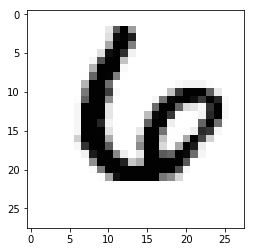

In [156]:
import matplotlib.pyplot as plt
import random

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

## 참고사이트
1. https://github.com/hunkim/DeepLearningZeroToAll/blob/master/lab-11-1-mnist_cnn.py
2. https://www.youtube.com/watch?v=pQ9Y9ZagZBk&list=PLlMkM4tgfjnLSOjrEJN31gZATbcj_MpUm&index=39